In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
cifar_mnist = keras.datasets.cifar10
(x_train, y_train), (x_test,y_test) = cifar_mnist.load_data()

In [17]:
class_names = [
    "airplane",
    "car",
    "birds",
    "cat",
    "deer",
    "dog",
    "frog",
    "Horse",
    "ship",
    "truck"
]

(32, 32, 3)

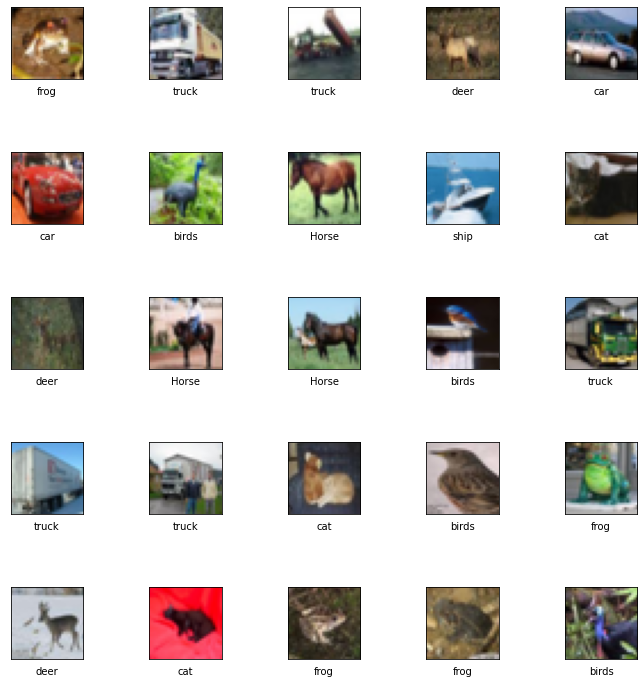

In [26]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])